**<p style="font-size: 35px; text-align: center">Distribuições de probabilidade</p>**



***<center>Fonte:Miguel Ángel Vélez Guerra</center>***

<hr/>

![Distribuciones](https://4.bp.blogspot.com/-ImwjGBnN9Yg/VuYgbbaNBJI/AAAAAAAAA_o/rdXnY7x6I8svIEsXRcm51-jrj_Lopdb-w/s1600/E2-U3.png)






In [9]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [35]:
import sys
sys.path.insert(0, "/Users/julianaforlin/Downloads/probability-statistics-python-master/resources/")

import mstats

In [28]:

%%javascript
// Script to generate the table of contents
$.getScript('../resources/table_of_contents.js')

<IPython.core.display.Javascript object>

<hr/>
<hr/>

## 1. Distribuição binomial

Um fabricante na Califórnia fornece um protótipo para uma peça de aeronave que requer o seu negócio. Este novo produto, enviado em lotes de n = 12, sofrem uma taxa de defeito de 40%.
a. Se você não quer um risco maior que 10% na probabilidade de que 5 dos 12 sejam com defeito, devo comprar desse revendedor?
b. Se você não quer enfrentar um risco maior que 20% de chance de mais de 5 sair defeituoso, devo comprar desse revendedor?


In [32]:
n_lotes = 12 # Número de lotes de protótipos de aeronaves tomados como amostra
pi_lotes = 0.4 # Porcentagem na taxa de defeitos dos lotes


Podemos notar com os dados que o exercício nos dá, que a distribuição que os valores seguem é uma distribuição * binomial *; Eles nos dão uma amostra (n) e uma probabilidade de sucesso (pi) que um evento ocorre.


In [19]:
distr_bin_lotes = ss.binom(n_lotes,pi_lotes)

0.14189395967999996
0.2253372825599999
4.800000000000001
2.8800000000000003
1.6970562748477143
[5 3 3 5 7 3 3 5 6 4]


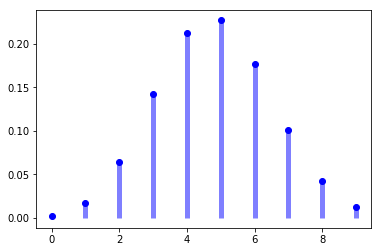

In [43]:
%matplotlib inline
print(distr_bin_lotes.pmf(3))
print(distr_bin_lotes.cdf(3))
print(distr_bin_lotes.mean())
print(distr_bin_lotes.var())
print(distr_bin_lotes.std())
print(distr_bin_lotes.rvs(10))
x = np.arange(0,10)
fig, ax = plt.subplots(1, 1)
ax.plot(x, ss.binom.pmf(x, n_lotes, pi_lotes), 'bo')
ax.vlines(x, 0, ss.binom.pmf(x, n_lotes, pi_lotes), colors='b', lw=5, alpha=0.5)

Aqui estamos declarando toda a distribuição binomial que nosso exercício seguirá, de acordo com o número da amostra (15), e nossa probabilidade de que um protótipo seja defeituoso (0,4). Faremos isso usando a função .binom (distribuição binomial) da biblioteca scipy.stats.

**a) Se você não quer um risco maior que 10% na probabilidade de que 5 dos 12 sejam defeituosos, você deve comprar daquele distribuidor?**

In [24]:
x_lotes_a = 5 # Número de lotes defectuosos a evaluar

Agora vamos usar a função * .pmf (função de massa de probabilidade) * da biblioteca * scipy.stats.binom * que determina a probabilidade em um determinado ponto.

Isso nos dá a probabilidade de que dos 12 lotes com uma taxa de defeito de 40%, há ** exatamente ** 5 lotes defeituosos.

In [44]:
prob_lotes_a = distr_bin_lotes.pmf(x_lotes_a)

prob_lotes_a

0.22703033548799986

Como podemos ver, de acordo com o resultado da função, temos uma probabilidade de ** 22,7% ** de haver 5 dos 12 lotes defeituosos.

** R / a) ** Como não queremos ter um risco maior que ** 10% ** em 5 de 12 unidades, então rejeitaremos esse distribuidor e não compraremos seus protótipos, pois este distribuidor tem um risco de ** 22,7% **

<hr/>

**b) Se você não quer enfrentar um risco maior que 20% de chance de que mais de 5 estarão com defeito, você deve comprar daquele distribuidor?**

In [46]:
x_lotes_b = 5 # Número de lotes defectuosos a evaluar

Agora vamos usar a função * .cdf (função de distribuição cumulativa) * da biblioteca * scipy.stats.binom * que nos dará o valor acumulado da função para o ponto que passamos como um parâmetro.

Isso nos dará a probabilidade de que dos 12 lotes com uma taxa de defeito de 40%, há ** menos de 5 ** lotes defeituosos. Então, como precisamos avaliar a probabilidade de haver mais de 5 ** lotes defeituosos, teremos que subtrair de 1 o valor que obtivemos (1 - valor)

In [47]:
prob_lotes_b = 1 - distr_bin_lotes.cdf(x_lotes_b)
prob_lotes_b

0.3347914424320001

Como podemos ver, de acordo com o resultado da função, temos uma probabilidade de ** 33,47% ** de haver mais de 5 lotes defeituosos na amostra de 12 lotes.

** R / b) ** Como não queremos enfrentar um risco maior que ** 20% ** probabilidade de que mais de 5 lotes estarão com defeito. Então devemos rejeitar a oferta deste distribuidor, que nos oferece um risco de ** 33,47% **

<hr/>
<hr/>



<hr/>
<hr/>

## 3. Distribuição de Poisson

O cabo usado para proteger as estruturas da ponte tem uma média de 3 defeitos por 100 jardas. Se você precisa de 50 jardas, qual delas
É a probabilidade de um defeito?

In [48]:
mu_yardas = (3/100) # Número promedio de defectos por cada unidad de yardas
n_yardas = 50 # Número de yardas del cable a tener en cuenta


Podemos afirmar que os valores do exercício seguem uma distribuição de * Poisson *, já que temos uma proporção de ocorrências de um evento por unidade de espaço que é sempre constante.


In [50]:
mu_yardas_cable = (mu_yardas * n_yardas)

Eles nos dizem que de acordo com a média de 3 defeitos por 100 jardas, temos que determinar a média de defeitos em 50 jardas, que são os metros que temos de cabo

In [51]:
distr_poi_yardas = ss.poisson(mu_yardas_cable)

0.0
[2 0 0 1 1 1 2 4 2 3]


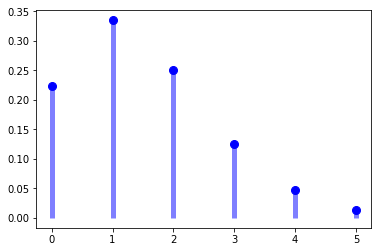

In [52]:

print(distr_poi_yardas.pmf(mu_yardas_cable))     
print(distr_poi_yardas.rvs(10))
x = np.arange(0,6)
fig, ax = plt.subplots(1, 1)
ax.plot(x, ss.poisson.pmf(x, mu_yardas_cable), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, ss.poisson.pmf(x, mu_yardas_cable), colors='b', lw=5, alpha=0.5)

Então, de acordo com esses dados, já podemos construir a distribuição * poisson * que os dados possuem.

Para isso vamos usar a função * .poisson (distribuição de poisson) * da biblioteca * scipy.stats *, que recebe como parâmetro o 'mu' do exercício que temos.

**Qual é a probabilidade de que há um defeito?**

In [53]:
n_yardas = 50 # Número de yardas del cable a tener en cuenta
x_cables = 1 # Número de cables tomados para evaluar si están defetuosos

Agora vamos determinar a probabilidade de que ** x_cables = 1 ** cabos selecionados estejam com defeito de acordo com as condições que eles nos deram.

Para isso, usaremos a função * .pmf (função de massa de probabilidade) * da biblioteca de * scipy.stats.poisson * que nos dá a probabilidade em um dado ponto

In [54]:
prob_yardas = distr_poi_yardas.pmf(x_cables)
prob_yardas

0.33469524022264474

**R/** A probabilidade de um dos cabos selecionados estar com defeito é de ** 33,47% **

<hr/>
<hr/>

## 4. Distribuição exponencial

Como gerente da Burguer Heaven, você percebe que os clientes entram no seu estabelecimento a uma taxa de 8 por hora. Qual é a probabilidade de que
gastar mais de 15 minutos entre a chegada de dois clientes?

In [56]:
mu_exp = (8/60) # Taxa média de bilhetes de clientes para estabelecimentos por minuto

Levando em conta a forma que as distribuições exponenciais seguem, podemos tomar a distribuição deste exercício como * exponencial *, já que temos uma taxa média de ocorrências em um intervalo de tempo.

In [57]:
##distr_exp = ss.expon(mu_exp)
distr_exp = ss.expon(mu_exp)

0.02092801333199164
0.8453617354507452
0.14429918312399642


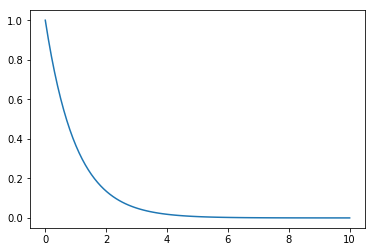

In [61]:

print(distr_exp.pdf(4))
print(distr_exp.cdf(2))       
print(distr_exp.rvs()) 
x = np.linspace(0,10,100)
y = ss.expon.pdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

**Qual é a probabilidade de que mais de 15 minutos passem entre a chegada de dois clientes?**



In [62]:
x_exp = 15 # Minutos a evaluar entre la entrada de 2 clientes

Então, temos que calcular a média de bilhetes 'mu' por minuto para o estabelecimento. Queremos determinar a probabilidade de que mais de 15 minutos passem entre a chegada de dois clientes.

Para isso, usaremos a função abaixo expon_cdf * (função de probabilidade acumulada) * que nos permite calcular a probabilidade acumulada até o ponto em que passamos como um parâmetro próximo ao 'mu' da distribuição. Depois de calcular essa probabilidade, teremos que subtrair essa probabilidade de 1, porque estamos interessados ​​na probabilidade de que passem 15 minutos ** entre a chegada de dois clientes.

In [67]:
def expon_cdf(mu, x): #mu = mu
    """
    Función para calcular la función de probabilidad acumulada de la distribución exponencial continua
    """
    px = 1 - np.exp(-mu * x)
    return px

In [68]:
prob_exp = 1 - expon_cdf(mu_exp, x_exp)

prob_exp

0.1353352832366127

**R/** A probabilidade de passar mais de 15 minutos entre a chegada de 2 clientes no estabelecimento é de ** 13,53% **

<hr/>
<hr/>

## 5. Dristribuição uniforme

Os tempos de conclusão de um job variam entre 10,2 minutos e 18,3 minutos e são pensados para serem distribuídos uniformemente. Qual é a probabilidade que leva entre 12,7 e 14,5 minutos para realizar este trabalho?

In [75]:
a_unif = 10.2 # Tiempo mínimo de terminación de un trabajo
b_unif = 18.3 # Tiempo máximo de terminación de un trabajo
rango_unif = b_unif - a_unif # Rango de oscilación de la terminación de los trabajos general

Pode-se assegurar que o exercício siga uma distribuição * uniforme *, já que temos um intervalo de ocorrência de um evento, e eles estão nos perguntando sobre a probabilidade de que outro intervalo esteja dentro do intervalo da distribuição.


In [76]:
distr_unif_trabajos = ss.uniform(a_unif, rango_unif)

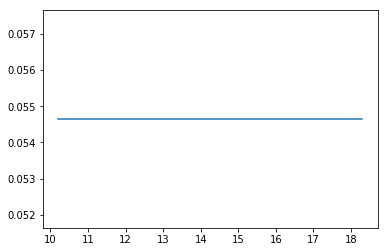

In [82]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(a_unif,b_unif, 100)
y = ss.uniform.pdf(x, a_unif,b_unif)
ax.plot(x, y)


Com esta informação, podemos construir a distribuição * uniform * que segue o exercício, com a ajuda da função * .uniform * da biblioteca * scipy.stats * que recebe o ponto de distribuição mínimo como parâmetros para sua construção, e o alcance que tem * (tempo máximo - tempo mínimo) *

**Qual é a probabilidade que leva entre 12,7 e 14,5 minutos para realizar este trabalho?**

In [84]:
a_trabajo = 12.7 # Tiempo mínimo a evaluar de la terminación de un trabajo
b_trabajo = 14.5 # Tiempo máximo a evaluar de la terminación de un trabajo
rango_trabajo = a_trabajo - b_trabajo # Rango de oscilación de la terminación de los trabajos a evaluar

Agora vamos determinar a probabilidade de que o tempo necessário para concluir um trabalho esteja no intervalo de ** work_range = 14,5 - 12,7 **.

Então, precisamos calcular a probabilidade acumulada até o valor máximo e subtraí-la com a probabilidade acumulada até o valor mínimo, a fim de obter a probabilidade de que esse intervalo de valores ocorra na distribuição uniforme.

Para isso, usaremos a função * .cdf (função de probabilidade acumulada) * da biblioteca * scipy.stats.uniform *.


In [85]:
prob_unif = distr_unif_trabajos.cdf(b_trabajo) - distr_unif_trabajos.cdf(a_trabajo)

prob_unif

0.22222222222222232

**R/** A probabilidade para concluir o trabalho entre 12,7 e 14,5 minutos é de ** 22,22% **

<hr/>
<hr/>

## 6. Distribuição normal

O Departamento de Agricultura dos Estados Unidos em um estudo sobre culturas detectaram que a precipitação diária em certos lugares no Havaí parece ser normalmente distribuído com uma média de 2,2 polegadas durante a temporada
chuvoso e o desvio padrão foi determinado como 0,8 polegadas.
a. Qual é a probabilidade de que vai chover mais de 3,3 polegadas em um dia durante o
estação chuvosa?
b. Encontre a probabilidade de chover mais de 1,3 polegadas.
c. Qual é a probabilidade de que a precipitação seja entre 2,7 e 3,0 polegadas?
d. Quanta chuva deve ser apresentada para exceder 10% da precipitação
diariamente?

In [86]:
mu_precip = 2.2 # Valor promedio de pulgadas que se precipitan diariamente
rho_precip = 0.8 # Desviación estándar de pulgadas que se precipitan diariamente

Podemos dizer que a distribuição é * normal *, porque temos uma média populacional e um desvio padrão da população também. Assumindo que todos os dados estão relacionados a esses valores.

In [87]:
distr_norm_precip = ss.norm(mu_precip, rho_precip)

0.039674564794584304
0.4012936743170762
2.9843678720938347


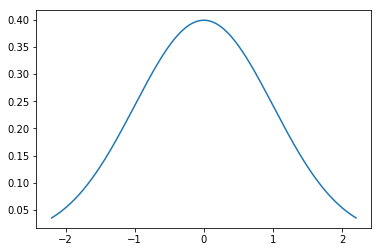

In [96]:
import math
from scipy.stats import norm

print(distr_norm_precip.pdf(4))
print(distr_norm_precip.cdf(2))       
print(distr_norm_precip.rvs()) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-mu_precip,mu_precip,1000)
y = ss.norm.pdf(x)
ax.plot(x,y)
plt.show()

Nós construímos a distribuição * normal * com a ajuda da função * .norm (distribuição normal) * da biblioteca * scipy.stats *; que recebe como parâmetros a média da população e o desvio padrão da população também.

**a) Qual é a probabilidade de chover mais de 3,3 polegadas em um dia durante a estação chuvosa?**

In [97]:
x_precip_a = 3.3 # Pulgadas precipitadas a evaluar

Determinaremos a probabilidade de chover mais de 3,3 polegadas em um dia ** x_precip> 3.3 **, que para isso precisaremos levar a probabilidade cumulativa até aquele ponto e subtrair esse valor de probabilidade de 1.

In [98]:
prob_precip_a = 1 - distr_norm_precip.cdf(3.3)

prob_precip_a

0.08456572235133575

**R/ a)** A probabilidade de chover mais de 3,3 polegadas em um dia durante a estação chuvosa é de ** 8,45% **

<hr/>

**b) Encontre a probabilidade de chover mais de 1,3 polegadas. **

In [99]:
x_precip_b = 1.3 # Pulgadas precipitadas a evaluar

Determinaremos a probabilidade de chover mais de 1,3 polegadas em um dia ** x_precip> 1,3 **, que para isso precisaremos levar a probabilidade acumulada até aquele ponto e subtrair esse valor de probabilidade de 1.

In [100]:
prob_precip_a = 1 - distr_norm_precip.cdf(1.3)

prob_precip_a

0.8697054828631912

**R/ b)** Há uma chance de chuva de 86,97% ** mais de 1,3 polegadas

<hr/>

**c) Qual é a probabilidade de que a precipitação seja entre 2,7 e 3,0 polegadas? **

In [101]:
x1_precip_c = 2.7 # Pulgadas mínimas precipitadas a evaluar
x2_precip_c = 3 # Pulgadas máximas precipitadas a evaluar

Então, temos que determinar a probabilidade de que a precipitação seja entre 2,7 e 3 polegadas, para isso vamos determinar a probabilidade acumulada até o ponto máximo (3) e subtrair com a probabilidade acumulada até o ponto mínimo (2,7).

In [102]:
prob_precip_c = distr_norm_precip.cdf(3) - distr_norm_precip.cdf(2.7)

prob_precip_c

0.10733027511724347

**R/ c)** A probabilidade de que a precipitação seja entre 2,7 e 3 polegadas é de ** 10,73% **
<hr/>

**d) Quanta chuva deve ser apresentada para exceder 10% da precipitação diária? **

In [40]:
prob_precip_d = 0.1 # Probabilidad de que ocurran 'x' numero de precipitaciones diarias

Então, para encontrar o valor da precipitação correspondente à probabilidade de 0,1 na distribuição normal, devemos tratá-la como uma função matemática, onde o eixo 'x' corresponde aos valores da precipitação que o exercício toma, e o eixo 'y' corresponde aos valores das respectivas probabilidades para aqueles valores 'x', levando em conta a função que segue a distribuição normal.


\begin{align}
p(x;\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{x - \mu}{\sigma} \right)^2}
\end{align}



Com isso em mente, podemos encontrar o valor do ponto em 'x' se soubermos o valor do ponto em 'y'

In [103]:
distr_norm_precip.ppf(0.1)

1.1747587475643197

**R/ d)** Mais ** 1,1747 ** São necessárias polegadas precipitadas para exceder 10% da precipitação diária.

<hr/>
<hr/>